## Dataset: Zillow Home Value Forecast (ZHVF) 

### Preprocessing methods used:
- **Handling missing values** - Helps in reducing biased results that arise due to missing data in predictive models, such as linear regression. To handle this, we are placing in the median to replace the missing values, which ensures that the distribution is preserved.
- **Scaling Features** - Standardizing growth columns here benefits linear regression as it allows the model to avoid bias towards features with large values and converge more quickly.
- **Grouping Data** - This helps with seeing the variation and how different growth is by differen regions, and can become important when bias is added depending on region as the nature of the housing market places heavy importance on regional effects. 

In [2]:
import pandas 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

data = pandas.read_csv('Zillow_Home_Value_Forecast.csv')
cleaned = data.dropna(subset=['StateName'])
growth = cleaned.columns[-3:]
#handling missing values here
imputer = SimpleImputer(strategy='median')
cleaned.loc[:, growth] = imputer.fit_transform(cleaned[growth])
# cleaned[growth] = imputer.fit_transform(cleaned[growth])
#scaling features here
scaler = StandardScaler()
cleaned.loc[:, growth] = scaler.fit_transform(cleaned[growth]) 
# cleaned[growth] = scaler.fit_transform(cleaned[growth])
#grouping data
bias = (cleaned.groupby('RegionType')[growth]).agg(['mean', 'std'])

print("Preprocessed Data Sample:")
print(cleaned.head())
print("\nRegional Bias Summary (Mean and Std by RegionType):")
print(bias)


Preprocessed Data Sample:
   RegionID  SizeRank       RegionName RegionType StateName    BaseDate  \
1    394913         1     New York, NY        msa        NY  2024-08-31   
2    753899         2  Los Angeles, CA        msa        CA  2024-08-31   
3    394463         3      Chicago, IL        msa        IL  2024-08-31   
4    394514         4       Dallas, TX        msa        TX  2024-08-31   
5    394692         5      Houston, TX        msa        TX  2024-08-31   

   2024-09-30  2024-11-30  2025-08-31  
1    1.065579    0.691364   -0.146486  
2    1.349691    1.531635    0.469428  
3    0.781467    0.451286   -0.223475  
4   -0.354981   -0.629062   -0.107992  
5   -0.354981   -0.509023   -0.377454  

Regional Bias Summary (Mean and Std by RegionType):
              2024-09-30             2024-11-30             2025-08-31  \
                    mean      std          mean      std          mean   
RegionType                                                               
msa     

In [3]:
print(cleaned[growth[:-1]])

     2024-09-30  2024-11-30
1      1.065579    0.691364
2      1.349691    1.531635
3      0.781467    0.451286
4     -0.354981   -0.629062
5     -0.354981   -0.509023
..          ...         ...
890   -1.491429   -2.549681
891    0.213243   -0.028868
892    0.497355    0.451286
893   -1.491429   -1.229256
894    3.338475    0.811403

[894 rows x 2 columns]


## **Linear Regression**


We chose this model becuase home value prediction is a regression problem, similar to the apartment rent prediction example we looked at in lecture. Also, home values have some linear relationships between certain features such a square footage (usually more square footage = more expensive), so applying linear regression here is pretty feasible. 

In [27]:
# Algorithm 1: Linear Regression (Supervised for Undergrad)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2 dates (features) to predict the 3rd date (target)
X = cleaned[growth[:-1]]
y = cleaned[growth[-1]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)
model = LinearRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mse ** 0.5

print("Evaluation Metrics:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Evaluation Metrics:
Mean Absolute Error: 0.38996283566699225
Mean Squared Error: 0.2590462162388718
Root Mean Squared Error: 0.5089658301289702


For this model, we will use the visualizations below to assess the performance of the model:

1.	**Actual vs. Predicted Values Plot**:

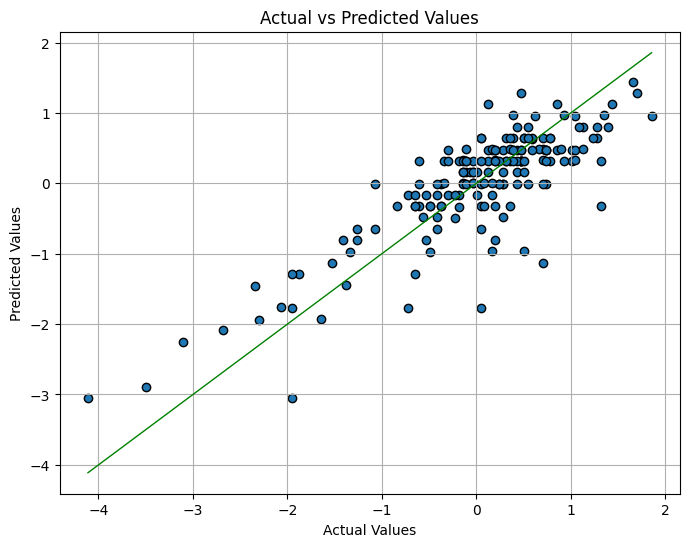

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, prediction, alpha=1, edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='g', linestyle='-', linewidth=1)
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

2.	**Residuals Distribution Plot**:

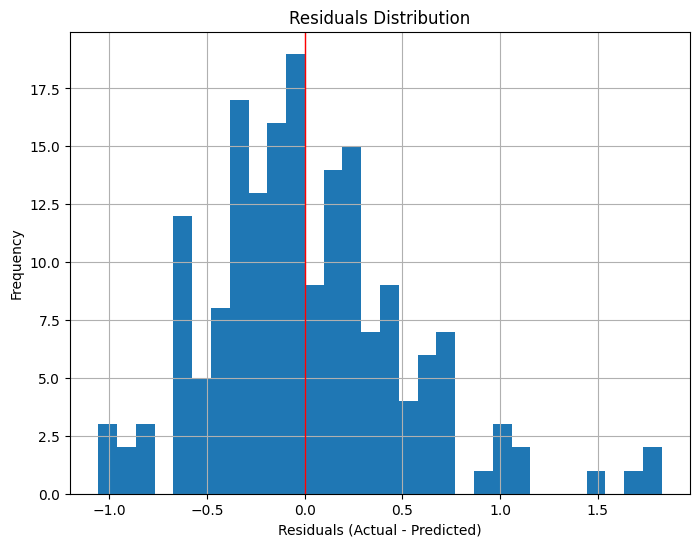

In [29]:
residuals = y_test - prediction
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, alpha=1)
plt.axvline(0, color='red', linestyle='-', linewidth=1)
plt.title("Residuals Distribution")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## **Random Forest Regressor**

Next, we implement the Random Forest Regressor model and evaluates its performance using the following steps:
1.	**Model Initialization**: A Random Forest Regressor is instantiated with random_state=40 for reproducibility and n_estimators=100, creating an ensemble of 100 decision trees to improve prediction accuracy.
2.	**Model Training**: The model is trained on the training dataset (X_train and y_train), learning patterns and relationships in the data.
3.	**Predictions**: Predictions are made on the testing dataset (X_test) using the trained model.
4.	**Evaluation Metrics**:
    - Mean Absolute Error (MAE): Quantifies the average absolute difference between predicted and actual values.
    - Mean Squared Error (MSE): Quantifies the average squared differences between predicted and actual values.
    - Root Mean Squared Error (RMSE): The square root of MSE, providing error estimates in the same units as the target variable.
	

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Algorithm 2: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=40, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, rf_predictions)
mse = mean_squared_error(y_test, rf_predictions)
rmse = mse ** 0.5

# Display results
print("Evaluation Metrics for Random Forest Regressor:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Evaluation Metrics for Random Forest Regressor:
Mean Absolute Error: 0.39967932729319766
Mean Squared Error: 0.2749282389623969
Root Mean Squared Error: 0.5243359981561412


For this model, we will use the visualizations below to assess the performance of the model:

1.	**Actual vs. Predicted Values Plot**:
    - Purpose: To visually compare the model’s predictions against the actual target values.
    - Interpretation:
        - Points lying close to the red diagonal line (y = x) indicate accurate predictions.
        - A significant scatter away from the line suggests errors or areas where the model struggles to predict accurately.
        - A tightly clustered plot around the line indicates a well-performing model.

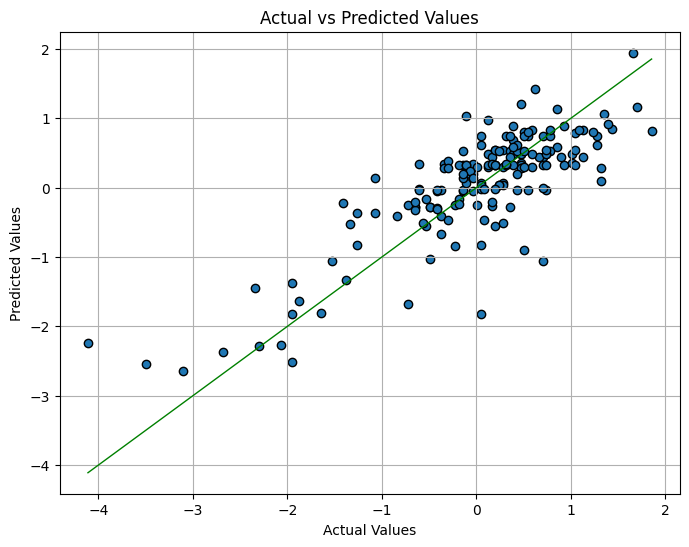

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, alpha=1, edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='g', linestyle='-', linewidth=1)
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

2.	**Residuals Distribution Plot**:
    - Purpose: To analyze the distribution of residuals (the difference between actual and predicted values).
    - Interpretation:
        - Ideally, residuals should be centered around zero and follow a normal distribution.
        - A symmetric, bell-shaped histogram indicates no major bias in the model.
        - Skewness or extreme outliers may suggest areas where the model underperforms or is biased.

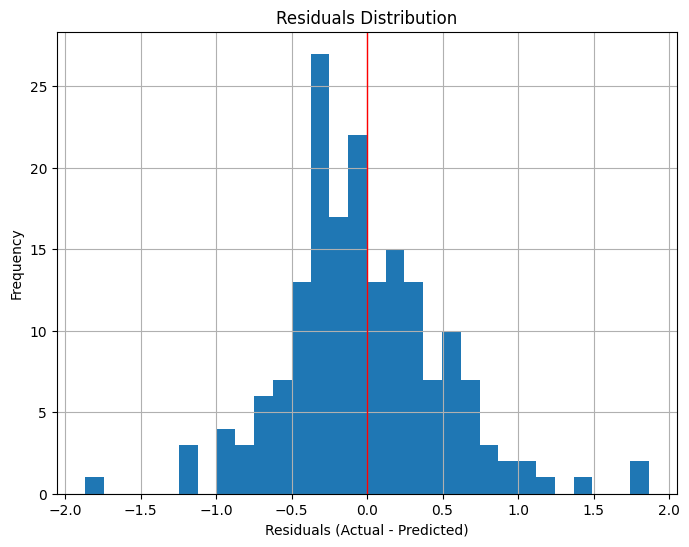

In [32]:
# Residuals Distribution
residuals = y_test - rf_predictions
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, alpha=1)
plt.axvline(0, color='red', linestyle='-', linewidth=1)
plt.title("Residuals Distribution")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

3.	**Feature Importance Plot**:
    - Purpose: To display how much each feature contributes to the predictions made by the Random Forest Regressor.
    - Interpretation:
        - Features with higher importance values are more influential in determining the predictions.
        - Features with very low importance might be less relevant and could potentially be removed to simplify the model.
        - Helps understand the model’s decision-making process and identify critical predictor features.

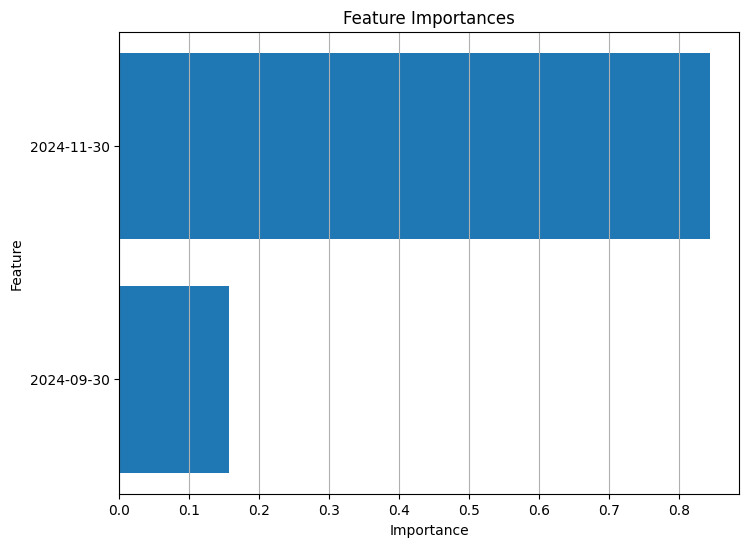

In [33]:
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances, alpha=1)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(True, axis='x')
plt.show()

## **Support Vector Machines**

We use Support Vector Machines (specifically Support Vector Regression for this regression task) as it produces an decision boundary based on optimal separation. Since we are working on a continuous target we are going to use Support Vector Regression for the regression task (SVR). It is also a good algorithm to use on a smaller dataset, attempting to linearly separate the data with a hyperplane.

In [34]:
# Algorithm 3: Support Vector Machines (SVM)
from sklearn import svm

# Using the Linear Kernel for separation as we have only 2 features
clf = svm.SVR(kernel='linear')
clf.fit(X_train, y_train)

# Make predictions
svm_predictions = clf.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, svm_predictions)
mse = mean_squared_error(y_test, svm_predictions)
rmse = mse ** 0.5

# Display results
print("Evaluation Metrics for SVM:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Evaluation Metrics for SVM:
Mean Absolute Error: 0.3876968828534418
Mean Squared Error: 0.26246282699512613
Root Mean Squared Error: 0.5123112598754064


For this model, we will use the visualizations below to assess the performance of the model:

1.	**Actual vs. Predicted Values Plot**:

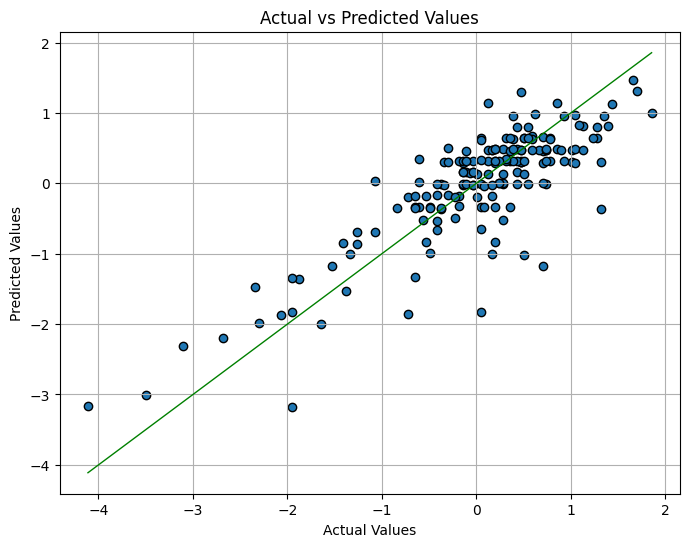

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, svm_predictions, alpha=1, edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='g', linestyle='-', linewidth=1)
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

2. **Residuals Distribution Plot**:

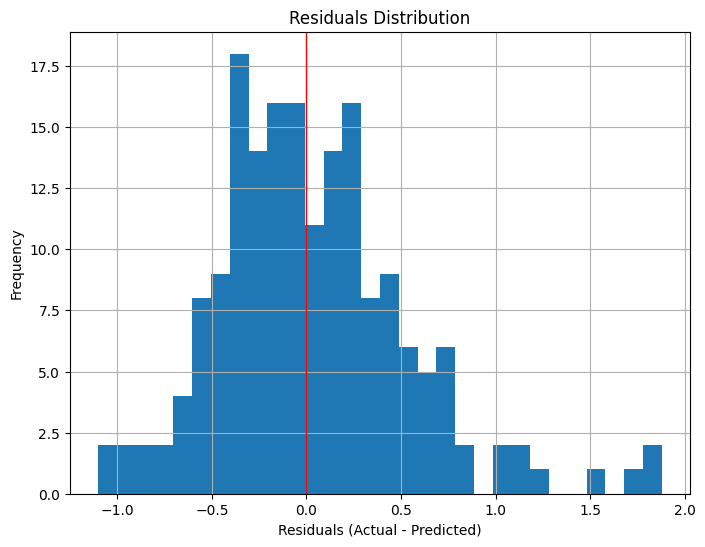

In [36]:
# Residuals Distribution
residuals = y_test - svm_predictions
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, alpha=1)
plt.axvline(0, color='red', linestyle='-', linewidth=1)
plt.title("Residuals Distribution")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## **Gradient Boosting Regressor**

Gradient Boosting Regressor is an ensemble learning algorithm that builds a series of small decision trees sequentially. Each tree tries to correct the errors of the previous ones, leading to highly accurate predictions. As it is known to work well for both small and medium-sized datasets, we can apply it for our regression task with incremental error improvement (100 trees by default: n_estimators).

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

model = GradientBoostingRegressor(random_state=40)
model.fit(X_train, y_train)
# Make Predictions
pred = model.predict(X_test)

# Calculate required metrics
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rsme = (mse)**(0.5)
print("Mean Squared Error: ",mse)
print("Mean Absolute Error: ",mae)
print("Root Mean Squared Error: ",rsme)

Mean Squared Error:  0.2783403793766313
Mean Absolute Error:  0.3957345982650105
Root Mean Squared Error:  0.5275797374583593


For this model, the following visualizations will be used to assess its performance:

1. **Actual vs. Predicted Values Plot**

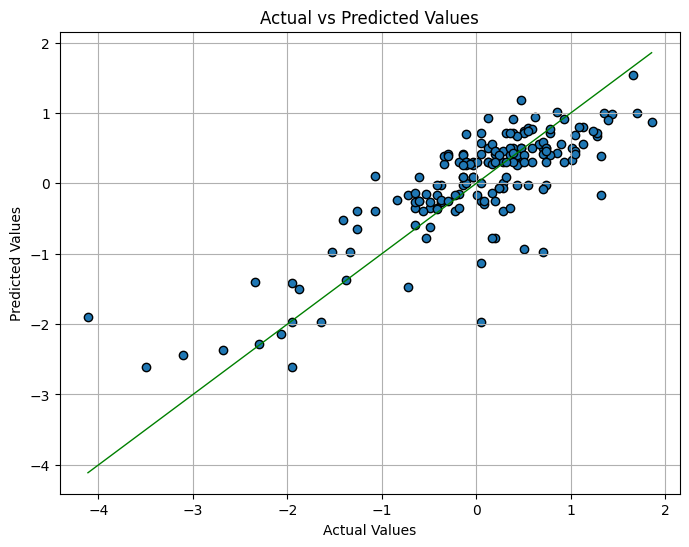

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, alpha=1, edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='g', linestyle='-', linewidth=1)
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

2. **Residuals Distribution Plot**

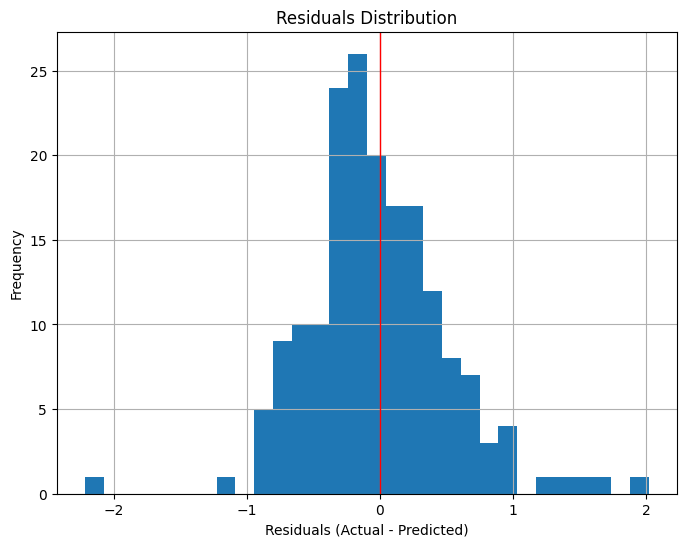

In [39]:
residuals = y_test - pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, alpha=1)
plt.axvline(0, color='red', linestyle='-', linewidth=1)
plt.title("Residuals Distribution")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()